Text(0.5, 1.0, 'True')

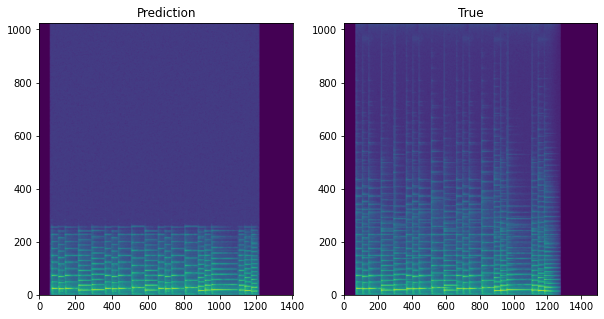

In [13]:
import numpy as np
import soundfile as sf
import tensorflow as tf
import matplotlib.pyplot as plt
from ipywidgets import interact

frame_step=256
frame_length=2048
steps=10000


def ances_normalization(spec,power=1):
    amp=np.power(np.abs(spec),power)
    angle=np.angle(spec)
    return amp*np.exp(1j*angle)

with open('../test_sounds/best.wav', 'rb') as f:
    data, samplerate = sf.read(f)
pred=tf.signal.stft(data,frame_length=frame_length,frame_step=frame_step,window_fn=tf.signal.hann_window).numpy()

with open('data/bach_test_short.wav', 'rb') as f:
    data, samplerate = sf.read(f)
true=tf.signal.stft(data,frame_length=frame_length,frame_step=frame_step,window_fn=tf.signal.hann_window).numpy()

pred=ances_normalization(pred,1/8)
true=ances_normalization(true,1/8)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5),facecolor='w', edgecolor='w')
ax1.imshow(np.abs(pred).squeeze().T,aspect='auto', origin='lower')
ax1.set_title('Prediction')

ax2.imshow(np.abs(true).squeeze().T,aspect='auto', origin='lower')
ax2.set_title('True')


